Prepare the environment

In [1]:
import gym
import numpy as np


numBlocks = 3
env = gym.make('BlocksWorld-v0')

env.seed(0)
env.reset()

LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.99
EPSILON_START = 0.9
EPSILON_END = 0
CONVERGENCE_LIMIT = 0.001

done = False
num_episodes = 2000

WARN: Environment '<class 'gym.envs.classic_control.blocksworld.BlocksWorldEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


Create the dictionary that will store the Q values

In [2]:
q_values = {}
#q_values = {'hola': 4}
#print (q_values['hola'])

In [3]:
#Prepare the dictionary keys
#Every key is a string like made from state([1 2]) + action (5) , example "1 2 5"
def get_key_from_arrays (state,action):
    state_str = " ".join(str(x) for x in state)
    action_str = str(action)
    dictionary_key = state_str + " " + action_str
    return (dictionary_key)

state = [1,2]
action = 5
print (get_key_from_arrays(state,action))

1 2 5


In [4]:
#Get and Set methods to read q_values from our dictionary
def get_q_value(state,action):
    dictionary_key = get_key_from_arrays(state,action)
    if (dictionary_key in q_values):
        return (q_values[dictionary_key])
    else:
        return 0

def set_q_value(state,action,value):
    dictionary_key = get_key_from_arrays(state,action)
    q_values[dictionary_key] = value

#state = [1,2]
#action = 5
#
#print (get_q_value(state,action))
#set_q_value(state,action,-8)
#print (get_q_value(state,action))




In [5]:
#Generate all possible actions depending on the number of Blocks
from itertools import product
def get_all_possible_actions_bad(nBlocks):
    d1 = range(0,nBlocks+1)
    d2 = range(0,nBlocks+1)    
    allActions = product(d1,d2)
    #for x in p:
    #    print (x)
    return (allActions)

def get_all_possible_actions(nBlocks):
    allActions = np.arange((nBlocks+1)*(nBlocks+1))
    #for x in p:
    #    print (x)
    return (allActions)



In [6]:
#Generate a list with all possible actions
allActions = get_all_possible_actions(numBlocks)

print (allActions)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [7]:
#Check all possible actions and return
#the q-value and the action with the maximum value
def get_maximum_q_value_for_all_possible_actions (state):
    max_value = -1000000.0
    which_action = 0
    for one_action in allActions:    
        val = get_q_value (state,one_action)
        if (val>max_value):
            #print (val)
            #print (max_value)
            max_value = val
            which_action = one_action
    #print ('STATE')
    #print (state)
    #print ('CHOOSING')
    #print (which_action)
    return (max_value,which_action)

#state = (0,1)
#print (get_maximum_q_value_for_all_possible_actions(state))

    

In [8]:
#Time difference update rule of the Q learning algorithm

def calculate_next_q_value (state,action,current_reward, next_state):
    new_q_value = get_q_value (state,action) + \
        LEARNING_RATE*(current_reward + \
        DISCOUNT_FACTOR*(get_maximum_q_value_for_all_possible_actions(next_state)[0]) - get_q_value(state,action))
    converged = get_q_value (state,action)-new_q_value
    set_q_value(state,action,new_q_value)
    return (converged)

In [9]:
#Select either the best action or randomly according
#to epsilon parameter
import random
def choose_next_action_epsilon_greedy(state,epsilon):    
    best_action = get_maximum_q_value_for_all_possible_actions(state)[1]
    #random_action = [random.randint(0,numBlocks-1),random.randint(0,numBlocks)]
    random_action = random.randint(0,(numBlocks+1)*(numBlocks+1)-1)
    BEST = 0
    RANDOM = 1
    next_action_boolean = np.random.choice([BEST, RANDOM],1,  p=[1-epsilon,epsilon])
    if (next_action_boolean == BEST):
        return (best_action)
    else:
        return (random_action)
#print (choose_next_action_epsilon_greedy(EPSILON_START))

In [10]:
#Run episodes until convergence
ep_lengths = []
updates = []
ep_index =[]
n = 0
while (n<num_episodes):    
    steps =1
    done = False
    current_state = env.reset()
    print (n)
    which_epsilon = EPSILON_START*(1- (n/num_episodes))
    #print (which_epsilon)
    while (done == False):
        #print (q_values)        
        next_action = choose_next_action_epsilon_greedy(current_state,which_epsilon)
        #print (next_action)
        obs, reward, done, empty = env.step (next_action)
        ret = calculate_next_q_value(current_state,next_action,reward,obs)
        updates.append(ret)
        ep_index.append(n)
        current_state = obs
        #print ('Next action ' + str(next_action))
        #print ('Obs ' + str(obs))
        #env.render()
        steps +=1    
    #print (done)
    print ("Episode completed, steps:" + str(steps))
    print ('New episode')
    ep_lengths.append(steps)
    n+=1

print ("Average episode length " + str(sum(ep_lengths) / float(len(ep_lengths))))


0

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
1

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
3

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:299
New episode
4

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:247
New episode
5

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:37
New episode
6

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:617
New episode
7

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:650
New episode
8

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:175
New episode
9

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:513
New episode
10

*************** PROBL

86

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
87

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
88

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:144
New episode
89

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:34
New episode
90

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
91

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
92

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:70
New episode
93

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:139
New episode
94

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:81
New episode
95

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
96

*************** PR

175

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
176

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
177

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
178

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
179

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:35
New episode
180

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
181

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
182

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:64
New episode
183

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:163
New episode
184

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
185

********

260

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:25
New episode
261

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:54
New episode
262

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
263

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
264

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:162
New episode
265

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
266

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
267

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
268

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
269

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:89
New episode
270

*******

348

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:67
New episode
349

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:77
New episode
350

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
351

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:46
New episode
352

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
353

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
354

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
355

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
356

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
357

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:30
New episode
358

*********

438

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:55
New episode
439

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
440

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
441

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
442

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:72
New episode
443

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
444

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
445

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
446

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
447

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
448

***********

532

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
533

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
534

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
535

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
536

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
537

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
538

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
539

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
540

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
541

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
542

************

621

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
622

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
623

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
624

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
625

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
626

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
627

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
628

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
629

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
630

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
631

***********

706

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
707

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
708

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
709

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
710

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
711

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
712

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
713

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
714

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
715

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
716

**********

798

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
799

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
800

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:32
New episode
801

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
802

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
803

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
804

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
805

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
806

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
807

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
808

**********

882

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
883

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
884

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
885

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
886

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
887

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
888

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
889

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
890

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
891

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
892

*************

975

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
976

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
977

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
978

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
979

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
980

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
981

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
982

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
983

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
984

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
985

**************

1059

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1060

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1061

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1062

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1063

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1064

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1065

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1066

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1067

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1068

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1069

****

1147

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1148

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1149

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1150

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1151

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
1152

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1153

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1154

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1155

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1156

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1157

***

1234

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1235

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1236

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
1237

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
1238

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1239

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1240

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1241

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1242

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
1243

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1244

***

1320

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1321

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1322

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1323

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1324

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1325

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1326

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1327

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1328

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1329

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1330

****

1404

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1405

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1406

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1407

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1408

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1409

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1410

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1411

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1412

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1413

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1414

****

1492

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1493

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1494

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1495

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1496

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1497

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1498

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1499

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
1500

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1501

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1502

***

1580

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1581

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1582

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1583

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1584

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
1585

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1586

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1587

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1588

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1589

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1590

****

1668

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1669

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1670

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
1671

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1672

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1673

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1674

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1675

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1676

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1677

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1678

*

1757

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1758

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1759

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1760

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1761

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1762

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1763

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1764

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1765

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1766

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1767

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1845

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1846

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1847

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1848

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1849

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1850

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1851

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1852

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1853

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1854

**********

1931

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1932

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1933

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1934

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1935

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1936

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1937

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1938

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1939

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1940

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1941

****

In [11]:
#print (q_values)
#for k,v in q_values.items():
#    print (k,v)

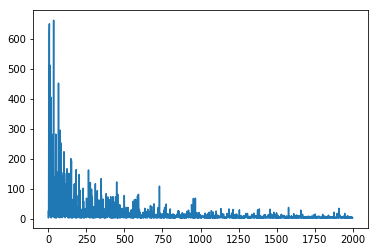

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plot the episode length sequence
plt.plot(ep_lengths)

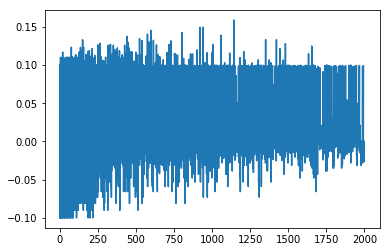

In [13]:
#Plot the TD update values, we should see that the TD update value is decreasing over time if the algorithm
#is converging
plt.plot(ep_index,updates)

In [14]:
print ('Average length of the last 20 episodes')
print (sum(ep_lengths[-20:])/20)

Average length of the last 20 episodes
3.25
